1\. Write a function that converts number representation (bin<->dec<->hex)

In [2]:
x = 12
binary = "1100"
hesa = "0a12"


def bin_to_dec(x):
    x=x[::-1]
    num=0
    for i in range (0,len(x)):
        num+=int(x[i])*(2**i)
    return num


def dec_to_bin(x):
    conv = ""
    while (x != 0):
        conv+= str(x % 2)
        x = x // 2
    return conv[::-1]


def hex_to_dec(x):
    Hdict={"0":0, "1":1 , "2":2 , "3":3 ,"4":4, "5":5, "6":6, "7":7 , "8":8, "9":9 , "a":10, "b":11 , "c":12,"d":13, "e":14 , "f":15}
    x=x[::-1]
    num=0
    for i in range (0,len(x)):
        num+=(Hdict[x[i]])*(16**i)
    return num



def dec_to_hex(x):
    Hdict={"0":0, "1":1 , "2":2 , "3":3 ,"4":4, "5":5, "6":6, "7":7 , "8":8, "9":9 , "a":10, "b":11 , "c":12,"d":13, "e":14 , "f":15}
    rev_Hdict = {value:key for (key,value) in Hdict.items()}
    conv = ""
    while (x != 0):
        conv+= str(rev_Hdict[x % 16])
        x = x // 16
    return conv[::-1]


def bin_to_hex(x):
    return( dec_to_hex(bin_to_dec(x)))

def hex_to_bin(x):
    return( dec_to_bin(hex_to_dec(x)))




print("Dec ", x ," -> Bin ", dec_to_bin(x))
print("Bin ", binary ," -> Dec ", bin_to_dec(binary))
print("Dec ", x ," -> hex ", dec_to_hex(x))
print("Hex ", hesa ," -> dec ", hex_to_dec(hesa))
print("Binary ", binary ," -> hex ", bin_to_hex(binary))
print("Hex ", hesa ," -> bin ", hex_to_bin(hesa))


Dec  12  -> Bin  1100
Bin  1100  -> Dec  12
Dec  12  -> hex  c
Hex  0a12  -> dec  2578
Binary  1100  -> hex  c
Hex  0a12  -> bin  101000010010


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
n32 = "11000010111011010000000000000000"

bias=127
sign = int(n32[0])
exp = (n32[1:9])
mant = (n32[9:])
frac=1

for i in range(1,24):
    frac +=  int(mant[i-1])*2**(-i)

print("The initial was " , n32 ,"\n")
print("Coverting in single precision floating point -> ", (-1)**(sign) * frac * 2**(bin_to_dec(exp) - bias))




The initial was  11000010111011010000000000000000 

Coverting in single precision floating point ->  -118.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [5]:
#overflow

import sys
varA , varB = sys.maxsize/4 , 1
previous = 0
prevprev=0

while(varA > previous):
    prevprev=previous
    previous=varA
    varA *=2

print("max - overflow -> ",prevprev)
print(previous)


#________________________

#underflow


varB = 1 
prev = 2
prev2=1

while(varB < prev):
    prev2=prev
    prev=varB
    varB /=2

print("min - underflow -> ", prev2)
print(prev)




max - overflow ->  8.98846567431158e+307
inf
min - underflow ->  5e-324
0.0


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [8]:
import numpy as np

n =0
n_current = 1
add =3

while (n_current != n):
    n = n_current
    add /= 2
    n_current+=add
    
print("Precision ", 10**(np.floor(np.log10(add))))

Precision  1e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [4]:
import math as m

def quad_eq_solver(a,b,c):
    print("Equation : ", a ,"x^2 + ", b , "x +", c)
    x1 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - m.sqrt(b**2 - 4*a*c))/(2*a)
    
    return x1 , x2


#a)

sol1 , sol2 = quad_eq_solver(0.001 , 1000 , 0.001)
print ("x1 = " , sol1 , " ,  x2 =" , sol2)


print("\n ")

#b)

def rex_quad_eq_solver(a,b,c):
    print("Equation : ", a ,"x^2 + ", b , "x +", c)
    x1 = (2*c)/(-b - m.sqrt(b**2 - 4*a*c))
    x2 = (2*c)/(-b + m.sqrt(b**2 - 4*a*c))
    
    return x1 , x2


sol3 , sol4 = rex_quad_eq_solver(0.001 , 1000 , 0.001)
print ("x1 = " , sol3 , " ,  x2 =" , sol4)

print(" \n Different from previous results --> Bad Accuracy/Roundoff Error")
print("Problems in subtracting numbers really closed by in value and also in the distributive law")

print("\n ")


#c)

def stable_quad_eq_solver(a,b,c):
    print("Equation : ", a ,"x^2 + ", b , "x +", c)
    x1 = (2*c)/(-b - m.sqrt(b**2 - 4*a*c))
    x2 = (-b - m.sqrt(b**2 - 4*a*c))/(2*a)
    
    return x1 , x2

sol_st1, sol_st2 = stable_quad_eq_solver(0.001 , 1000 , 0.001)
print ("x1 = " , sol_st1 , " ,  x2 =" , sol_st2)



def VerifySol(a, b, c, x):
    return a*x**2+b*x+c

a=0.001
b=1000
c=0.001

print("\nFirst Solver : \n ax1^2 + bx1 + c = ", VerifySol(a, b, c, sol1), "   <--- Bad Accuracy", "\n ax2^2 + bx2 + c = ", VerifySol(a, b, c,sol2) )

print("\nSecond Solver : \n ax1^2 + bx1 + c = ", VerifySol(a, b, c, sol3), "\n ax2^2 + bx2 + c = ", VerifySol(a, b, c,sol4) , "  <--- Bad Accuracy" )

print("\n Stable Funct  \n ax1^2 + bx1 + c = ", VerifySol(a, b, c, sol_st1), "\n ax2^2 + bx2 + c = ", VerifySol(a, b, c,sol_st2) )


print("\n The optimal solution use one formula of the first solver and one from the second to avoid roundoff errors")

Equation :  0.001 x^2 +  1000 x + 0.001
x1 =  -9.999894245993346e-07  ,  x2 = -999999.999999

 
Equation :  0.001 x^2 +  1000 x + 0.001
x1 =  -1.000000000001e-06  ,  x2 = -1000010.5755125057
 
 Different from previous results --> Bad Accuracy/Roundoff Error
Problems in subtracting numbers really closed by in value and also in the distributive law

 
Equation :  0.001 x^2 +  1000 x + 0.001
x1 =  -1.000000000001e-06  ,  x2 = -999999.999999

First Solver : 
 ax1^2 + bx1 + c =  1.0575401665491313e-08    <--- Bad Accuracy 
 ax2^2 + bx2 + c =  7.247924804689582e-08

Second Solver : 
 ax1^2 + bx1 + c =  0.0 
 ax2^2 + bx2 + c =  10575.62534720993   <--- Bad Accuracy

 Stable Funct  
 ax1^2 + bx1 + c =  0.0 
 ax2^2 + bx2 + c =  7.247924804689582e-08

 The optimal solution use one formula of the first solver and one from the second to avoid roundoff errors


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Derivative with incremental ratio =  1.010000000000001
Derivative analitically  =  1

The results are different, problem in the subctraction ( f(x+delta) - f(x) )
the two numbers are really closed by in value 



Derivative with incremental ratio ( delta =  0.01 ) =  1.010000000000001
Derivative analitically  =  1
Difference is =  0.010000000000000897


Derivative with incremental ratio ( delta =  0.0001 ) =  1.0000999999998899
Derivative analitically  =  1
Difference is =  9.999999988985486e-05


Derivative with incremental ratio ( delta =  1e-06 ) =  1.0000009999177333
Derivative analitically  =  1
Difference is =  9.99917733279787e-07


Derivative with incremental ratio ( delta =  1e-08 ) =  1.0000000039225287
Derivative analitically  =  1
Difference is =  3.922528746258536e-09


Derivative with incremental ratio ( delta =  1e-10 ) =  1.000000082840371
Derivative analitically  =  1
Difference is =  8.284037100736441e-08


Derivative with incremental ratio ( delta =  1e-12 ) =  1.000

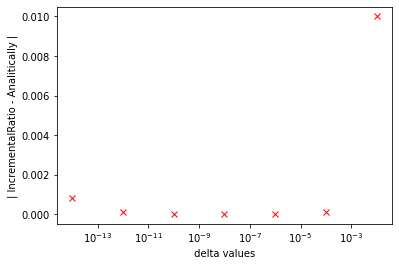

In [15]:
def f(x):
    return x*(x-1)



#a)
x=1
delta=10**(-2)

print("Derivative with incremental ratio = ", ((f(x+delta) - f(x))/(delta)))
print("Derivative analitically  = ", (2*x -1))   

print("\nThe results are different, problem in the subctraction ( f(x+delta) - f(x) )")
print("the two numbers are really closed by in value ")

print("\n\n")
#b)
deltas=[10**y for y in range(-2, -15 , -2)]
diff=[]

for i in range (7):
    print("Derivative with incremental ratio ( delta = ", deltas[i] ,") = ", ((f(x+deltas[i]) - f(x))/(deltas[i])))
    print("Derivative analitically  = ", (2*x -1))
    diff.append(abs(((f(x+deltas[i]) - f(x))/(deltas[i])) - 1.))
    print("Difference is = " , diff[i] )
    print("\n")

    
print(" Decreasing the value of delta, the accuracy is getting better until delta =", 10**(-8) ,"and \nthen getting worse for smaller values, in contrast to what expected")

import matplotlib.pyplot as plt
import numpy as np

plt.xscale("log")
plt.plot(deltas, diff, "rx")
plt.xlabel(" delta values ")
plt.ylabel("| IncrementalRatio - Analitically |")
plt.show()



7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [65]:
import math as m

def f(x):
    return m.sqrt(1 - x**2)

def integral(N):
    integ=0
    for k in range (1,N+1):
        integ+=(2/N)*(f(-1 +(2/N)*k))
    return integ

#a)

print("Calculated value of the Integral is = " , integral(100))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 100* (m.pi/2 - integral(100))/(m.pi/2) , "%")


#b)
print("\n")
%timeit integral(2*10**6)
print("limit to compute under 1 sec is almost for N = ", 2*10**6)
print("Calculated value of the Integral is = " , integral(2*10**6))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 100* (m.pi/2 - integral(2*10**6))/(m.pi/2) , "%")

print("\n")
%timeit integral(2*10**8)
print("limit to compute over one minute is almost for N = ", 2*10**8)
print("Calculated value of the Integral is = " , integral(2*10**8))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 100* (m.pi/2 - integral(2*10**8))/(m.pi/2) , "%")

Calculated value of the Integral is =  1.5691342555492505
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  0.10581074180619238 %


879 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
limit to compute under 1 sec is almost for N =  2000000
Calculated value of the Integral is =  1.5707963262069677
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  3.742871094826833e-08 %


1min 28s ± 2.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
limit to compute over one minute is almost for N =  200000000
Calculated value of the Integral is =  1.5707963267944416
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  2.8964251299194427e-11 %
